### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/algonacci/INHEAD/main/data/result/val.csv")
df.drop(["link", "source"], axis=1, inplace=True)
df

,title,topic
0,Seorang WNI menjadi korban salah tembak di Ame...,Internasional
1,Harga Saham Allo Bank BBHI Anjlok Bagaimana Na...,Bisnis
2,Puan Maharani atau Ganjar Pranowo PDIP Jawab H...,Politik
3,Kasus Covid,Kesehatan
4,175 Ribu Pekerjaan per Bulan di AS Hilang Mula...,Ekonomi
...,...,...
994,Arti Nama Mac di MacBook Air Fanboy Apple Hara...,Teknologi
995,VIDEO Menyaksikan Kemeriahan Konser BTS di Cal...,Entertainment
996,Cegah Kecelakaan di Gunung Bromo Polres Probol...,Pariwisata
997,Wajib Tahu Jurus Amankan Rupiah Jika Resesi Sa...,Ekonomi


### Exploratory Data Analysis

In [ ]:
df["topic"].value_counts()

Internasional    100
Bisnis           100
Kesehatan        100
Ekonomi          100
Pariwisata       100
Olahraga         100
Entertainment    100
Pendidikan       100
Teknologi        100
Politik           99
Name: topic, dtype: int64

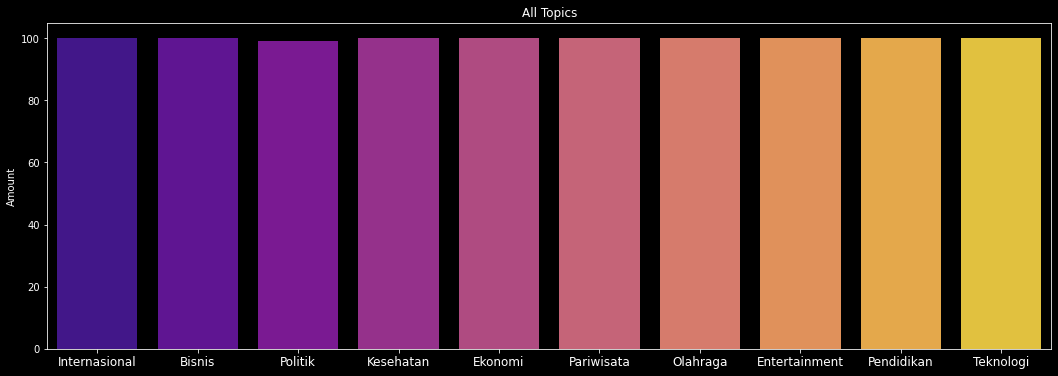

In [ ]:
objects = df['topic'].unique()
y_pos = np.arange(len(objects))
performance = [len(df[df['topic'] == topic]) for topic in df['topic'].unique()]

plt.figure(figsize=(18,6))
sns.barplot(y_pos[:], performance[:], palette=("plasma"))
plt.xticks(y_pos[:], objects[:], fontsize=12)
plt.ylabel('Amount')
plt.title('All Topics')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f1ece9f90>,
      dtype=object)

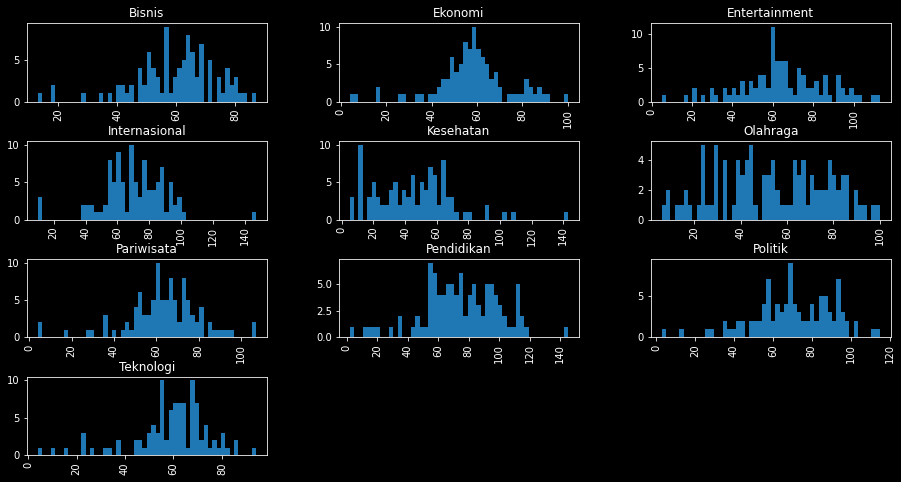

In [ ]:
df['length'] = df['title'].apply(len)
df.hist(column='length', by='topic', bins=50, figsize=(15,8))

In [ ]:
def text_cleaning(data):
  temporary_text = []

  for text in data:
    # removal of links[https://blabala.com]
    text = re.sub(r"http\S+", "", text)

    # removal of new line
    text = re.sub('\n', '', text)

    # removal of RT
    text = re.sub('RT', '', text)

    # removal of punctuations and numbers
    text = re.sub("[^a-zA-Z^']", " ", text)
    text = re.sub(" {2,}", " ", text)

    # remove leading and trailing whitespace
    text = text.strip()

    # remove whitespace with a single space
    text = re.sub(r'\s+', ' ', text)

    # convert text to Lowercase
    text = text.lower();
    temporary_text.append(text)
  return temporary_text

In [ ]:
df['case_folded'] = text_cleaning(df['title'])
df.head()

,title,topic,length,case_folded
0,Seorang WNI menjadi korban salah tembak di Ame...,Internasional,59,seorang wni menjadi korban salah tembak di ame...
1,Harga Saham Allo Bank BBHI Anjlok Bagaimana Na...,Bisnis,65,harga saham allo bank bbhi anjlok bagaimana na...
2,Puan Maharani atau Ganjar Pranowo PDIP Jawab H...,Politik,88,puan maharani atau ganjar pranowo pdip jawab h...
3,Kasus Covid,Kesehatan,11,kasus covid
4,175 Ribu Pekerjaan per Bulan di AS Hilang Mula...,Ekonomi,67,ribu pekerjaan per bulan di as hilang mulai da...


### Tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [ ]:
df['tokenized'] = tokenized(df['case_folded'])
df.head()

,title,topic,length,case_folded,tokenized
0,Seorang WNI menjadi korban salah tembak di Ame...,Internasional,59,seorang wni menjadi korban salah tembak di ame...,"[seorang, wni, menjadi, korban, salah, tembak,..."
1,Harga Saham Allo Bank BBHI Anjlok Bagaimana Na...,Bisnis,65,harga saham allo bank bbhi anjlok bagaimana na...,"[harga, saham, allo, bank, bbhi, anjlok, bagai..."
2,Puan Maharani atau Ganjar Pranowo PDIP Jawab H...,Politik,88,puan maharani atau ganjar pranowo pdip jawab h...,"[puan, maharani, atau, ganjar, pranowo, pdip, ..."
3,Kasus Covid,Kesehatan,11,kasus covid,"[kasus, covid]"
4,175 Ribu Pekerjaan per Bulan di AS Hilang Mula...,Ekonomi,67,ribu pekerjaan per bulan di as hilang mulai da...,"[ribu, pekerjaan, per, bulan, di, as, hilang, ..."


### Stopwords Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df['no_stopwords'] = remove_stopwords(df['tokenized'])
df

,title,topic,length,case_folded,tokenized,no_stopwords
0,Seorang WNI menjadi korban salah tembak di Ame...,Internasional,59,seorang wni menjadi korban salah tembak di ame...,"[seorang, wni, menjadi, korban, salah, tembak,...","[wni, korban, salah, tembak, amerika, serikat]"
1,Harga Saham Allo Bank BBHI Anjlok Bagaimana Na...,Bisnis,65,harga saham allo bank bbhi anjlok bagaimana na...,"[harga, saham, allo, bank, bbhi, anjlok, bagai...","[harga, saham, allo, bank, bbhi, anjlok, nasib..."
2,Puan Maharani atau Ganjar Pranowo PDIP Jawab H...,Politik,88,puan maharani atau ganjar pranowo pdip jawab h...,"[puan, maharani, atau, ganjar, pranowo, pdip, ...","[puan, maharani, ganjar, pranowo, pdip, harapa..."
3,Kasus Covid,Kesehatan,11,kasus covid,"[kasus, covid]",[covid]
4,175 Ribu Pekerjaan per Bulan di AS Hilang Mula...,Ekonomi,67,ribu pekerjaan per bulan di as hilang mulai da...,"[ribu, pekerjaan, per, bulan, di, as, hilang, ...","[ribu, pekerjaan, as, hilang, dampak, resesi]"
...,...,...,...,...,...,...
994,Arti Nama Mac di MacBook Air Fanboy Apple Hara...,Teknologi,56,arti nama mac di macbook air fanboy apple hara...,"[arti, nama, mac, di, macbook, air, fanboy, ap...","[arti, nama, mac, macbook, air, fanboy, apple,..."
995,VIDEO Menyaksikan Kemeriahan Konser BTS di Cal...,Entertainment,54,video menyaksikan kemeriahan konser bts di cal...,"[video, menyaksikan, kemeriahan, konser, bts, ...","[video, menyaksikan, kemeriahan, konser, bts, ..."
996,Cegah Kecelakaan di Gunung Bromo Polres Probol...,Pariwisata,86,cegah kecelakaan di gunung bromo polres probol...,"[cegah, kecelakaan, di, gunung, bromo, polres,...","[cegah, kecelakaan, gunung, bromo, polres, pro..."
997,Wajib Tahu Jurus Amankan Rupiah Jika Resesi Sa...,Ekonomi,59,wajib tahu jurus amankan rupiah jika resesi sa...,"[wajib, tahu, jurus, amankan, rupiah, jika, re...","[wajib, jurus, amankan, rupiah, resesi]"


In [ ]:
cleaned = df[df['title'].str.split(" ").str.len() < 6].index
df.drop(cleaned , inplace=True)
df

,title,topic,length,case_folded,tokenized,no_stopwords
0,Seorang WNI menjadi korban salah tembak di Ame...,Internasional,59,seorang wni menjadi korban salah tembak di ame...,"[seorang, wni, menjadi, korban, salah, tembak,...","[wni, korban, salah, tembak, amerika, serikat]"
1,Harga Saham Allo Bank BBHI Anjlok Bagaimana Na...,Bisnis,65,harga saham allo bank bbhi anjlok bagaimana na...,"[harga, saham, allo, bank, bbhi, anjlok, bagai...","[harga, saham, allo, bank, bbhi, anjlok, nasib..."
2,Puan Maharani atau Ganjar Pranowo PDIP Jawab H...,Politik,88,puan maharani atau ganjar pranowo pdip jawab h...,"[puan, maharani, atau, ganjar, pranowo, pdip, ...","[puan, maharani, ganjar, pranowo, pdip, harapa..."
4,175 Ribu Pekerjaan per Bulan di AS Hilang Mula...,Ekonomi,67,ribu pekerjaan per bulan di as hilang mulai da...,"[ribu, pekerjaan, per, bulan, di, as, hilang, ...","[ribu, pekerjaan, as, hilang, dampak, resesi]"
5,Menelusuri Kawah Purba Gunung Bromo,Pariwisata,36,menelusuri kawah purba gunung bromo,"[menelusuri, kawah, purba, gunung, bromo]","[menelusuri, kawah, purba, gunung, bromo]"
...,...,...,...,...,...,...
994,Arti Nama Mac di MacBook Air Fanboy Apple Hara...,Teknologi,56,arti nama mac di macbook air fanboy apple hara...,"[arti, nama, mac, di, macbook, air, fanboy, ap...","[arti, nama, mac, macbook, air, fanboy, apple,..."
995,VIDEO Menyaksikan Kemeriahan Konser BTS di Cal...,Entertainment,54,video menyaksikan kemeriahan konser bts di cal...,"[video, menyaksikan, kemeriahan, konser, bts, ...","[video, menyaksikan, kemeriahan, konser, bts, ..."
996,Cegah Kecelakaan di Gunung Bromo Polres Probol...,Pariwisata,86,cegah kecelakaan di gunung bromo polres probol...,"[cegah, kecelakaan, di, gunung, bromo, polres,...","[cegah, kecelakaan, gunung, bromo, polres, pro..."
997,Wajib Tahu Jurus Amankan Rupiah Jika Resesi Sa...,Ekonomi,59,wajib tahu jurus amankan rupiah jika resesi sa...,"[wajib, tahu, jurus, amankan, rupiah, jika, re...","[wajib, jurus, amankan, rupiah, resesi]"


### Finishing

In [ ]:
df['ready'] = df['no_stopwords'].apply(lambda x: ' '.join(x))
df.head()

,title,topic,length,case_folded,tokenized,no_stopwords,ready
0,Seorang WNI menjadi korban salah tembak di Ame...,Internasional,59,seorang wni menjadi korban salah tembak di ame...,"[seorang, wni, menjadi, korban, salah, tembak,...","[wni, korban, salah, tembak, amerika, serikat]",wni korban salah tembak amerika serikat
1,Harga Saham Allo Bank BBHI Anjlok Bagaimana Na...,Bisnis,65,harga saham allo bank bbhi anjlok bagaimana na...,"[harga, saham, allo, bank, bbhi, anjlok, bagai...","[harga, saham, allo, bank, bbhi, anjlok, nasib...",harga saham allo bank bbhi anjlok nasib laba b...
2,Puan Maharani atau Ganjar Pranowo PDIP Jawab H...,Politik,88,puan maharani atau ganjar pranowo pdip jawab h...,"[puan, maharani, atau, ganjar, pranowo, pdip, ...","[puan, maharani, ganjar, pranowo, pdip, harapa...",puan maharani ganjar pranowo pdip harapan masy...
4,175 Ribu Pekerjaan per Bulan di AS Hilang Mula...,Ekonomi,67,ribu pekerjaan per bulan di as hilang mulai da...,"[ribu, pekerjaan, per, bulan, di, as, hilang, ...","[ribu, pekerjaan, as, hilang, dampak, resesi]",ribu pekerjaan as hilang dampak resesi
5,Menelusuri Kawah Purba Gunung Bromo,Pariwisata,36,menelusuri kawah purba gunung bromo,"[menelusuri, kawah, purba, gunung, bromo]","[menelusuri, kawah, purba, gunung, bromo]",menelusuri kawah purba gunung bromo


In [ ]:
df.drop(['title', 'length', 'case_folded', 'tokenized', 'no_stopwords'], inplace=True, axis=1)
df = df.rename(columns={"ready": "title"})
df = df.reindex(columns=['title', 'topic'])

In [ ]:
df

,title,topic
0,wni korban salah tembak amerika serikat,Internasional
1,harga saham allo bank bbhi anjlok nasib laba b...,Bisnis
2,puan maharani ganjar pranowo pdip harapan masy...,Politik
4,ribu pekerjaan as hilang dampak resesi,Ekonomi
5,menelusuri kawah purba gunung bromo,Pariwisata
...,...,...
994,arti nama mac macbook air fanboy apple harap m...,Teknologi
995,video menyaksikan kemeriahan konser bts califo...,Entertainment
996,cegah kecelakaan gunung bromo polres proboling...,Pariwisata
997,wajib jurus amankan rupiah resesi,Ekonomi


In [ ]:
df.to_csv("val.csv", index=False)